<a href="https://colab.research.google.com/github/neeleshbisht99/RemoteSensingImageClassification/blob/master/reading_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

# Import the "gdal" submodule from within the "osgeo" module
from osgeo import gdal

# We can check which version we're running by printing the "__version__" variable
print("GDAL's version is: " + gdal.__version__)
print(gdal)

In [ ]:
dataset = gdal.Open('LE70220491999322EDC01_stack.gtif', gdal.GA_ReadOnly)
print(dataset)

num_bands = dataset.RasterCount
print('Number of bands in image: {n}\n'.format(n=num_bands))

rows = dataset.RasterYSize
cols = dataset.RasterXSize
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

desc = dataset.GetDescription()
metadata = dataset.GetMetadata()

print('Raster description: {desc}'.format(desc=desc))
print('Raster metadata:')
print(metadata)
print('\n')

proj = dataset.GetProjection()
print('Image projection:')
print(proj + '\n')

gt = dataset.GetGeoTransform()
print('Image geo-transform: {gt}\n'.format(gt=gt))


In [ ]:
blue = dataset.GetRasterBand(1)
# print(blue)

datatype = blue.DataType
# print('Band datatype: {dt}'.format(dt=blue.DataType))

datatype_name = gdal.GetDataTypeName(blue.DataType)
# print('Band datatype: {dt}'.format(dt=datatype_name))

bytes = gdal.GetDataTypeSize(blue.DataType)
# print('Band datatype size: {b} bytes\n'.format(b=bytes))

band_max, band_min, band_mean, band_stddev = blue.GetStatistics(0, 1)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

In [ ]:
import numpy as np

blue_data = blue.ReadAsArray()

print(blue_data)
print()
print('Blue band mean is: {m}'.format(m=blue_data.mean()))
print('Size is: {sz}'.format(sz=blue_data.shape))

In [ ]:
from osgeo import gdal_array

image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

for b in range(dataset.RasterCount):
    band = dataset.GetRasterBand(b + 1)
    image[:, :, b] = band.ReadAsArray()

print(image)
print(image.dtype)

In [30]:
print('Red band mean: {r}'.format(r=image[:, :, 2].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, :, 3].mean()))

Red band mean: 589.379808
NIR band mean: 3442.297712


In [32]:
b_red = 2
b_nir = 3

ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / \
        (image[:, :, b_nir] + image[:, :, b_red]).astype(np.float64)

print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

NDVI matrix: 
[[0.71390828 0.71079741 0.69352291 ... 0.79392185 0.81408451 0.79165379]
 [0.68064263 0.6787194  0.6643924  ... 0.81387182 0.79880597 0.77389811]
 [0.66904762 0.67268446 0.66332892 ... 0.78495923 0.78278801 0.81253291]
 ...
 [0.68301262 0.68593651 0.67145614 ... 0.81065089 0.78050922 0.76519266]
 [0.67341718 0.6622986  0.65331611 ... 0.80436681 0.77483099 0.75      ]
 [0.63973799 0.62396514 0.66731813 ... 0.7094648  0.70005244 0.74574523]]

Max NDVI: 0.9046013008913515
Mean NDVI: 0.7088133953809207
Median NDVI: 0.7319195214790647
Min NDVI: 0.09470304975922954


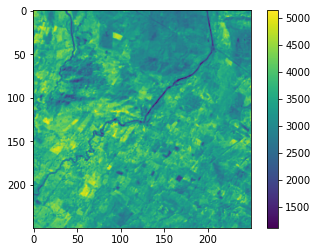

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image[:, :, 3])
plt.colorbar()

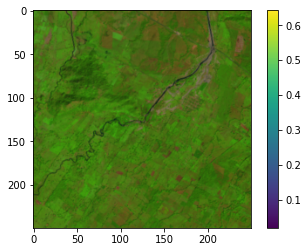

In [47]:
index = np.array([4, 3, 2])
colors = image[:, :, index].astype(np.float64)


max_val = 8000
min_val = 0

colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.imshow(colors)
plt.colorbar()

In [54]:
from osgeo import ogr

training_dataset = ogr.Open('training_data.shp')
print(training_dataset)

None
